In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
data_git = pd.read_csv(r"E:\data\merge_commit.csv", sep=",", header=None)
data_git.columns = ["id", "commit_hash", "is_conflicting", "p1", "p2", "project_id", "is_done", "author_name", 
                 "author_email", "timestamp"]

In [4]:
refactoring_region = pd.read_csv(r"E:\data\refactoring_region.csv", sep=",", header=None)
refactoring_region.columns = ["id", "start_line", "length", "type", "path", "refactoring_id", "refactoring_commit_id", 
                              "commit_hash", "project_id"]

In [5]:
conflicting_region_history = pd.read_csv(r"E:\data\conflicting_region_history.csv", sep=",", header=None)
conflicting_region_history.columns = ["id", "commit_hash", "merge_parent", "old_start_line", "old_length", "old_path", 
                                      "new_start_line", "new_length", "new_path", "conflicting_region_id", 
                                      "conflicting_java_file_id", "merge_commit_id", "project_id", "author_name", 
                                      "author_email", "timestamp"]

In [6]:
conflicting_region_history.drop(columns = ["old_start_line", "old_length", "old_path", "new_start_line", "new_length", 
                                           "new_path", "author_name", "author_email", "conflicting_region_id", 
                                           "conflicting_java_file_id", "conflicting_region_id"], inplace=True)

In [7]:
evolutionary_commits_with_refactoring = refactoring_region.merge(conflicting_region_history, on="commit_hash", how="inner")
evolutionary_commits_with_refactoring.drop_duplicates(subset="id_y", keep="first", inplace=True)

In [ ]:
jfstmerge_conflicts = pd.read_csv(r"E:\data\conflicts_jfstmerge.csv", sep=";")

In [9]:
conflicting_region = pd.read_csv(r"E:\data\conflicting_region.csv", sep=",", header=None)
conflicting_region.columns = ['id','p1_start','p1_length','File','p2_start','p2_length','p2_path',
                                   'conflicting_java_file_id','merge_commit_id','project_id']

In [10]:
conflicting_java_file = pd.read_csv(r"E:\data\conflicting_java_file.csv", sep=",", header=None)
conflicting_java_file.columns = ["id", "path", "type", "project_id", "is_done"]

In [11]:
conflicting_region_history = pd.read_csv(r"E:\data\conflicting_region_history.csv", sep=",", header=None)
conflicting_region_history.columns = ["id", "commit_hash", "merge_parent", "old_start_line", "old_length", "old_path", 
                                      "new_start_line", "new_length", "new_path", "conflicting_region_id", 
                                      "conflicting_java_file_id", "merge_commit_id", "project_id", "author_name", 
                                      "author_email", "timestamp"]

In [12]:
results_git = pd.read_csv(r"E:\data\manual_analysis_results.csv", sep=";")

In [13]:
conflicting_regions_git = conflicting_region.merge(results_git, on="merge_commit_id", how="inner")

In [14]:
conflicting_regions_git.drop_duplicates(subset="id", inplace=True)

In [15]:
conflicting_regions_git["merge_commit_id"].nunique()

77

In [16]:
conflicting_regions_size_pure_git = conflicting_regions_git[conflicting_regions_git["floss"] == "no"][["p1_start", "p1_length","p2_start", "p2_length", "merge_commit_id"]]

In [17]:
size = conflicting_regions_size_pure_git["p1_length"] + conflicting_regions_size_pure_git["p2_length"] 

In [18]:
conflicting_regions_size_pure_git["size"] = size

In [19]:
conflicting_regions_size_pure_git["size"].describe()

count    2874.000000
mean       47.813848
std       145.587435
min         0.000000
25%         3.000000
50%        12.000000
75%        19.000000
max      2417.000000
Name: size, dtype: float64

In [20]:
box_plot_pure_size = conflicting_regions_size_pure_git.groupby("merge_commit_id").agg({"size": np.sum})

In [21]:
box_plot_pure_size.reset_index(inplace=True)

In [22]:
box_plot_pure_count = conflicting_regions_size_pure_git.groupby("merge_commit_id").agg({"size": np.size})

In [23]:
box_plot_pure_count.reset_index(inplace=True)

In [24]:
box_plot_pure_count.head()

,merge_commit_id,size
0,314,6
1,321,17
2,18142,3
3,26330,27
4,27141,3


In [25]:
descriptive_cr_pure = box_plot_pure_size.merge(box_plot_pure_count, on="merge_commit_id", how="inner")

In [ ]:
descriptive_cr_pure.head()

In [27]:
descriptive_cr_pure.rename(columns={"size_x":"size", "size_y":"count"}, inplace=True)

In [ ]:
descriptive_cr_pure.head()

In [29]:
conflicting_time = pd.read_csv(r"E:\data\conflicting_time_data_2.csv", sep=",")

In [ ]:
result = pd.DataFrame(columns = ['commit_hash', "delta_time"])
for i, infos in conflicting_time.iterrows():
    time_p1 = infos["time_to_commit"] - infos["p1"]
    time_p2 = infos["time_to_commit"] - infos["p2"]
    if time_p1 < time_p2 :
         result=result.append({'commit_hash' : infos["commit_hash"] , 'delta_time' : time_p1} , ignore_index=True)
    else:     
         result=result.append({'commit_hash' : infos["commit_hash"] , 'delta_time' : time_p2} , ignore_index=True)

In [31]:
time_to_merge = result

In [32]:
git_hash = data_git[["id", "commit_hash"]]

In [33]:
time_git = time_to_merge.merge(git_hash, on="commit_hash", how="inner")

In [ ]:
time_git.head()

In [35]:
time_pure = descriptive_cr_pure.merge(time_git, left_on="merge_commit_id", right_on="id", how="inner")

In [ ]:
time_pure.head()

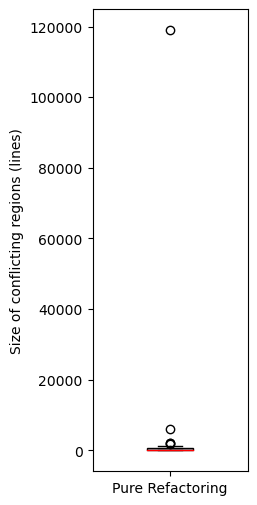

In [37]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(descriptive_cr_pure["size"], widths=0.3, patch_artist=True, 
           boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

ax.set_xticklabels(['Pure Refactoring'])
ax.set_ylabel('Size of conflicting regions (lines)')
ax.set_title('')

# Exibir gráfico
plt.show()

In [38]:
crh_pure = time_pure.merge(conflicting_region_history, on="merge_commit_id", how="inner")
crh_pure_number = time_pure.merge(conflicting_region_history, on="merge_commit_id", how="inner")
crh_pure.drop_duplicates(subset="id_y", inplace=True)
crh_pure = crh_pure.groupby('merge_commit_id')['id_y'].nunique()
crh_pure = crh_pure.reset_index()
crh_pure.rename(columns={"id_y":"number_evolutionary"}, inplace=True)


In [39]:
crh_pure.head()

,merge_commit_id,number_evolutionary
0,314,29
1,321,33
2,18142,9
3,26330,83
4,27141,11


In [47]:
descriptive_cr_pure = descriptive_cr_pure.merge(crh_pure, how="inner", on="merge_commit_id") 

In [50]:
descriptive_cr_pure.rename(columns={"size_x":"size", "size_y":"count"}, inplace=True)

In [51]:
descriptive_cr_pure.head()

,merge_commit_id,size,count,number_evolutionary
0,314,166,6,29
1,321,130,17,33
2,18142,38,3,9
3,26330,161,27,83
4,27141,54,3,11


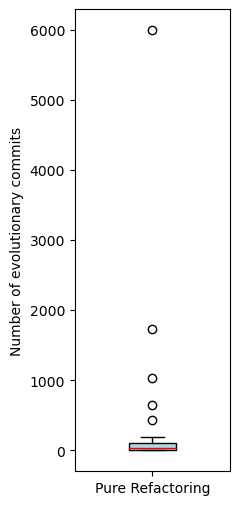

In [52]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(descriptive_cr_pure["number_evolutionary"], widths=0.3, patch_artist=True, 
           boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

ax.set_xticklabels(['Pure Refactoring'])
ax.set_ylabel('Number of evolutionary commits')
ax.set_title('')

plt.show()

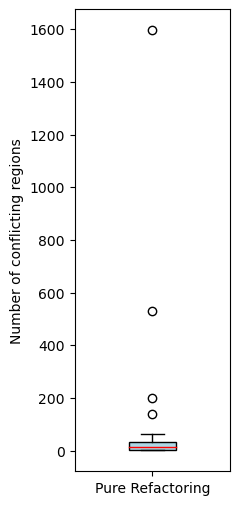

In [53]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(descriptive_cr_pure["count"], widths=0.3, patch_artist=True, 
           boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

ax.set_xticklabels(['Pure Refactoring'])
ax.set_ylabel('Number of conflicting regions')
ax.set_title('')

plt.show()

In [54]:
conflicting_regions_size_floss_git = conflicting_regions_git[conflicting_regions_git["floss"] == "yes"][["p1_start", "p1_length","p2_start", "p2_length", "merge_commit_id"]]
size = conflicting_regions_size_floss_git["p1_length"] + conflicting_regions_size_floss_git["p2_length"] 
conflicting_regions_size_floss_git["size"] = size
conflicting_regions_size_floss_git["size"].describe()

count    1802.000000
mean       19.027192
std        62.759519
min         0.000000
25%         2.000000
50%         7.000000
75%        15.000000
max      1964.000000
Name: size, dtype: float64

In [55]:
box_plot_floss_size = conflicting_regions_size_floss_git.groupby("merge_commit_id").agg({"size": np.sum})
box_plot_floss_size.reset_index(inplace=True)

In [56]:
box_plot_floss_count = conflicting_regions_size_floss_git.groupby("merge_commit_id").agg({"size": np.size})
box_plot_floss_count.reset_index(inplace=True)

In [57]:
box_plot_floss_count.head()

,merge_commit_id,size
0,575,3
1,15155,1
2,21211,2
3,22833,26
4,22935,44


In [58]:
descriptive_cr_floss = box_plot_floss_size.merge(box_plot_floss_count, on="merge_commit_id", how="inner")
descriptive_cr_floss.head()

,merge_commit_id,size_x,size_y
0,575,55,3
1,15155,8,1
2,21211,8,2
3,22833,556,26
4,22935,1017,44


In [59]:
descriptive_cr_floss.rename(columns={"size_x":"size", "size_y":"count"}, inplace=True)
descriptive_cr_floss.head()

,merge_commit_id,size,count
0,575,55,3
1,15155,8,1
2,21211,8,2
3,22833,556,26
4,22935,1017,44


In [60]:
time_floss = descriptive_cr_floss.merge(time_git, left_on="merge_commit_id", right_on="id", how="inner")
time_floss.head()

,merge_commit_id,size,count,commit_hash,delta_time,id
0,575,55,3,c68168f07b936aa7994d1ec2df0ab3326bc882b8,2385.0,575
1,15155,8,1,f551e70534da17f61bf3ba3529ba75b236babdd3,1706.0,15155
2,21211,8,2,12d8506cf83520f1e7612bdd0a6114ee0cb84685,5553327.0,21211
3,22833,556,26,aa6f5118f5b88ed40e1318b59d47465bae6067df,84976.0,22833
4,22935,1017,44,e1d07214dfe12f893aa4052e08dbc3025f5cb67d,166864.0,22935


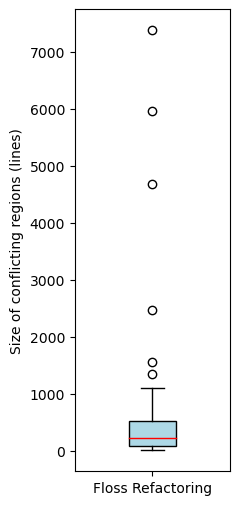

In [61]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(descriptive_cr_floss["size"], widths=0.3, patch_artist=True, 
           boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

ax.set_xticklabels(['Floss Refactoring'])
ax.set_ylabel('Size of conflicting regions (lines)')
ax.set_title('')

plt.show()


In [62]:
crh_floss = time_floss.merge(conflicting_region_history, on="merge_commit_id", how="inner")
crh_floss_number = time_floss.merge(conflicting_region_history, on="merge_commit_id", how="inner")
crh_floss.drop_duplicates(subset="id_y", inplace=True)
crh_floss = crh_floss.groupby('merge_commit_id')['id_y'].nunique()
crh_floss = crh_floss.reset_index()
crh_floss.rename(columns={"id_y":"number_evolutionary"}, inplace=True)

In [63]:
crh_floss.head()

,merge_commit_id,number_evolutionary
0,575,9
1,15155,5
2,21211,7
3,22833,69
4,22935,168


In [64]:
descriptive_cr_floss = descriptive_cr_floss.merge(crh_floss, how="inner", on="merge_commit_id") 

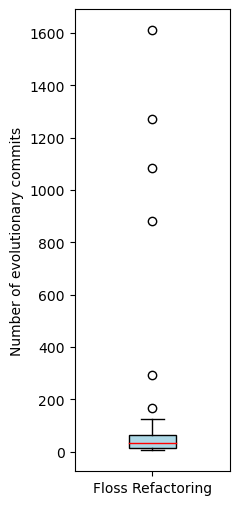

In [65]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(descriptive_cr_floss["number_evolutionary"], widths=0.3, patch_artist=True, 
           boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

ax.set_xticklabels(['Floss Refactoring'])
ax.set_ylabel('Number of evolutionary commits')
ax.set_title('')

plt.show()


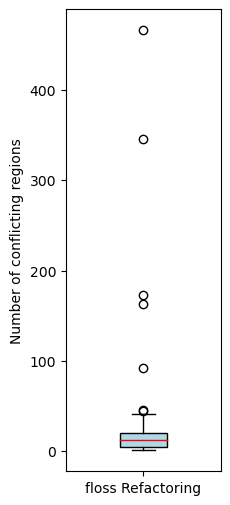

In [66]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(descriptive_cr_floss["count"], widths=0.3, patch_artist=True, 
           boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red"))

ax.set_xticklabels(['floss Refactoring'])
ax.set_ylabel('Number of conflicting regions')
ax.set_title('')

plt.show()

### Shapiro-Wilk test - number of conflicting regions

In [ ]:
import scipy.stats as stats

floss_group = descriptive_cr_floss["count"]
pure_group = descriptive_cr_pure["count"]

stat1, p1 = stats.shapiro(floss_group)
stat2, p2 = stats.shapiro(pure_group)

print(f"Shapiro-Wilk test - floss_group: p-value = {p1}")
print(f"Shapiro-Wilk test - pure_group: p-value = {p2}")

In [ ]:
stat, p_value = stats.mannwhitneyu(floss_group, pure_group, alternative='two-sided')

print(f"U statistics: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: different groups.")
else:
    print("Do not reject H0: statistically similar groups.")

### Shapiro-Wilk test - size of conflicting regions

In [ ]:
import scipy.stats as stats

floss_group = descriptive_cr_floss["size"]
pure_group = descriptive_cr_pure["size"]

stat1, p1 = stats.shapiro(floss_group)
stat2, p2 = stats.shapiro(pure_group)

print(f"Shapiro-Wilk test - floss_group: p-value = {p1}")
print(f"Shapiro-Wilk test - pure_group: p-value = {p2}")


In [ ]:
stat, p_value = stats.mannwhitneyu(floss_group, pure_group, alternative='two-sided')

print(f"U statistics: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: different groups.")
else:
    print("Do not reject H0: statistically similar groups.")

### Shapiro-Wilk test - number of evolutionary commits

In [ ]:
import scipy.stats as stats

floss_group = descriptive_cr_floss["number_evolutionary"]
pure_group = descriptive_cr_pure["number_evolutionary"]

stat1, p1 = stats.shapiro(floss_group)
stat2, p2 = stats.shapiro(pure_group)

print(f"Shapiro-Wilk test - floss_group: p-value = {p1}")
print(f"Shapiro-Wilk test - pure_group: p-value = {p2}")


In [ ]:
stat, p_value = stats.mannwhitneyu(floss_group, pure_group, alternative='two-sided')

print(f"U statistics: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: different groups.")
else:
    print("Do not reject H0: statistically similar groups.")